9.11.2020
# Using NumPy, matplotlib and SciPy
## Tutorial 1, Exercise 2: Histograms, noise and filtering
The goal of this exercise is for you to **become familiar with the important packages NumPy, matplotlib and SciPy**.
Here you will load an image, add noise and look at the histograms of the different color channels.
You need to replace the `???` in the code with the required commands.

Your task is to calculate histograms of an image, add noise to it,
and apply a low-pass filter.

## Part 1: Loading the image and analyzing the color channels

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as nd

Use ``plt.imread`` to read in ``'bears.jpg'`` and save the color channels into separate NumPy arrays. Check the image dimensions before and after splitting the colors with with the ``shape`` attribute of ``img``, red, green, and blue.
``img`` should be a 3D array and the colors a 2D array, respectively.

In [6]:
img = plt.imread("bears.jpg") / 255.  # Division to norm to an interval [0, 1]
sh = img.shape



Select red, green, and blue channels:

In [7]:
red_channel = img[:,:,0]
green_channel = img[:,:,1]
blue_channel = img[:,:,2]

In [8]:
print(sh, red_channel.shape, green_channel.shape, blue_channel.shape)

(350, 350, 3) (350, 350) (350, 350) (350, 350)


Display the original and the three color channels in an array of subplots.
Therefore, open a figure with ``plt.figure()`` and use ``plt.subplot(...)`` to plot
them in a $2 \times 2$ array. To use the function correctly, look up the help by
typing ``plt.subplot?`` in the ipython console or ``help(plt.subplot)`` in Python.

In [9]:
help(plt.subplot)

Help on function subplot in module matplotlib.pyplot:

subplot(*args, **kwargs)
    Add a subplot to the current figure.
    
    Wrapper of `.Figure.add_subplot` with a difference in behavior
    explained in the notes section.
    
    Call signatures::
    
       subplot(nrows, ncols, index, **kwargs)
       subplot(pos, **kwargs)
       subplot(**kwargs)
       subplot(ax)
    
    Parameters
    ----------
    *args : int, (int, int, *index*), or `.SubplotSpec`, default: (1, 1, 1)
        The position of the subplot described by one of
    
        - Three integers (*nrows*, *ncols*, *index*). The subplot will take the
          *index* position on a grid with *nrows* rows and *ncols* columns.
          *index* starts at 1 in the upper left corner and increases to the
          right. *index* can also be a two-tuple specifying the (*first*,
          *last*) indices (1-based, and including *last*) of the subplot, e.g.,
          ``fig.add_subplot(3, 1, (1, 2))`` makes a subplot t

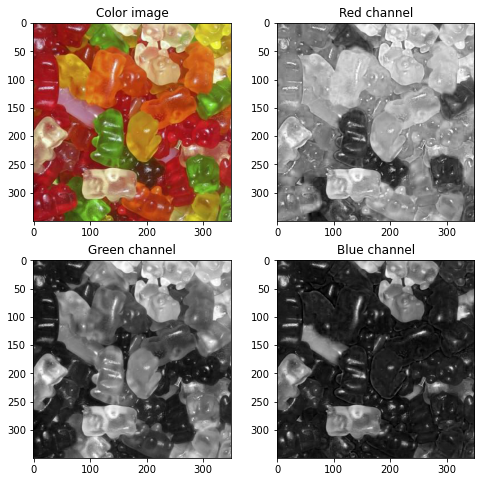

In [10]:
plt.figure(1, figsize=(8,8))
plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title('Color image')
plt.subplot(2, 2, 2)
plt.imshow(red_channel, cmap='gray')
plt.title('Red channel')
plt.subplot(2, 2, 3)
plt.imshow(green_channel, cmap='gray')
plt.title('Green channel')
plt.subplot(2, 2, 4)
plt.imshow(blue_channel, cmap='gray')
plt.title('Blue channel');

Create the histograms of the three color channels separately
using the ``np.histogram`` function. Use 50 bins and a range of ``(0, 1)``.
Afterwards, plot them into one histogram line plot. Keep in mind that
``np.histograms`` returns left and right bin margins. Therefore, you will need
to create the central bin positions by yourself!

In [11]:
help(np.histogram)

Help on function histogram in module numpy:

histogram(a, bins=10, range=None, normed=None, weights=None, density=None)
    Compute the histogram of a set of data.
    
    Parameters
    ----------
    a : array_like
        Input data. The histogram is computed over the flattened array.
    bins : int or sequence of scalars or str, optional
        If `bins` is an int, it defines the number of equal-width
        bins in the given range (10, by default). If `bins` is a
        sequence, it defines a monotonically increasing array of bin edges,
        including the rightmost edge, allowing for non-uniform bin widths.
    
        .. versionadded:: 1.11.0
    
        If `bins` is a string, it defines the method used to calculate the
        optimal bin width, as defined by `histogram_bin_edges`.
    
    range : (float, float), optional
        The lower and upper range of the bins.  If not provided, range
        is simply ``(a.min(), a.max())``.  Values outside the range are
      

In [13]:
red_hist = np.histogram(red_channel, bins = 50, range = (0,1))
green_hist = np.histogram(green_channel, bins = 50, range = (0,1))
blue_hist = np.histogram(blue_channel, bins = 50, range = (0,1))

In case you do not know how to do the last part look at the lower parts of
the script. The lines before will appear again in a similar fashion.


In [14]:
red_hist

(array([   0,    0,    0,    0,    0,    0,    0,    0,    5,   21,   67,
         173,  354,  751, 1308, 1764, 2168, 2356, 2596, 2185, 2362, 1966,
        1899, 2099, 2423, 3129, 3580, 4355, 4763, 5362, 6867, 5644, 5736,
        5626, 5712, 6173, 5773, 4930, 4605, 4436, 5766, 4329, 3572, 2080,
        1486, 1295, 1001,  724,  506,  553]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]))

In [17]:
red_bins = red_hist[1]
central_bins = (red_bins[1:] + red_bins[:-1]) / 2.
central_bins

array([0.01, 0.03, 0.05, 0.07, 0.09, 0.11, 0.13, 0.15, 0.17, 0.19, 0.21,
       0.23, 0.25, 0.27, 0.29, 0.31, 0.33, 0.35, 0.37, 0.39, 0.41, 0.43,
       0.45, 0.47, 0.49, 0.51, 0.53, 0.55, 0.57, 0.59, 0.61, 0.63, 0.65,
       0.67, 0.69, 0.71, 0.73, 0.75, 0.77, 0.79, 0.81, 0.83, 0.85, 0.87,
       0.89, 0.91, 0.93, 0.95, 0.97, 0.99])

In [19]:
red_bins[:-1] 

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
       0.88, 0.9 , 0.92, 0.94, 0.96, 0.98])

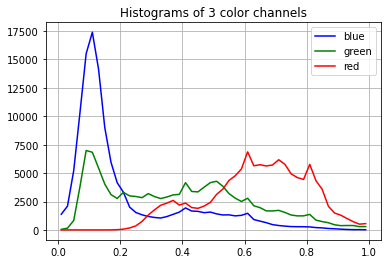

In [20]:
plt.figure(2)
plt.title('Histograms of 3 color channels')
plt.plot(central_bins, blue_hist[0], 'b', label='blue')
plt.plot(central_bins, green_hist[0], 'g', label='green')
plt.plot(central_bins, red_hist[0], 'r', label='red')
plt.grid()
plt.legend()

It is more appropriate to use a bar graph instead of a normal plot for histograms. The ``plt.bar`` function takes the width of each bar as a third parameter:

In [21]:
bin_width = red_bins[1] - red_bins[0]

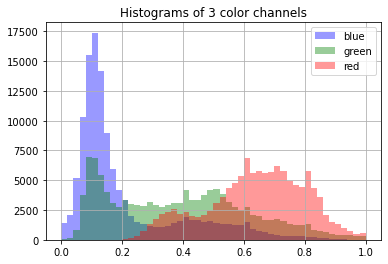

In [22]:
plt.figure(3)
plt.title('Histograms of 3 color channels')
plt.bar(central_bins, blue_hist[0], bin_width, color='b', label='blue', alpha=.4)
plt.bar(central_bins, green_hist[0], bin_width, color='g', label='green', alpha=.4)
plt.bar(central_bins, red_hist[0], bin_width, color='r', label='red', alpha=.4)
plt.grid()
plt.legend()


## Part 2: Adding noise to the image

Now, let's add some **Gaussian noise** with a standard deviation of 0.2 and a mean of zero to the image with the function
``np.random.normal``:

In [23]:
help(np.random.normal)

Help on built-in function normal:

normal(...) method of numpy.random.mtrand.RandomState instance
    normal(loc=0.0, scale=1.0, size=None)
    
    Draw random samples from a normal (Gaussian) distribution.
    
    The probability density function of the normal distribution, first
    derived by De Moivre and 200 years later by both Gauss and Laplace
    independently [2]_, is often called the bell curve because of
    its characteristic shape (see the example below).
    
    The normal distributions occurs often in nature.  For example, it
    describes the commonly occurring distribution of samples influenced
    by a large number of tiny, random disturbances, each with its own
    unique distribution [2]_.
    
    .. note::
        New code should use the ``normal`` method of a ``default_rng()``
        instance instead; please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    loc : float or array_like of floats
        Mean ("centre") of the distribution

In [25]:
img_noisy = img + np.random.normal(0,0.2, img.shape)
img_noisy

array([[[ 4.52229759e-01,  2.63113980e-01, -1.48221341e-03],
        [ 7.51160069e-01,  5.18548199e-03, -2.09495192e-01],
        [-4.55191554e-02,  2.12169264e-01,  2.04354307e-01],
        ...,
        [ 5.45248394e-01,  9.30302515e-01,  3.10649869e-01],
        [ 8.21186497e-01,  4.32663574e-01,  2.24140809e-01],
        [ 4.15435221e-01,  4.56139638e-01,  5.28115499e-01]],

       [[ 5.48398951e-01,  2.67069552e-01, -4.49506310e-02],
        [ 6.44164291e-01,  5.00171512e-01,  4.57626564e-03],
        [ 4.40366805e-01,  6.67252365e-02,  2.51666933e-01],
        ...,
        [ 9.15255812e-01,  9.41513598e-01,  6.12436382e-01],
        [ 6.56778643e-01,  1.02343110e+00,  2.21171234e-02],
        [ 6.83344795e-01,  8.12295097e-01,  2.69113220e-01]],

       [[ 4.24805503e-01,  3.07459062e-01,  4.16160029e-02],
        [ 5.52649535e-01,  2.82505619e-01,  4.49585842e-01],
        [ 4.84040072e-01,  2.69696150e-01,  1.86708918e-01],
        ...,
        [ 7.75868451e-01,  7.13053628e-01,

Note, that values below 0. and above 1. wrap around on the color scale
Therefore, they have to be set back to 0. or 1. respectively
Hint: The coordinates to index the array can also be a boolean array of the
same shape. So, if you want to select all pixels with a value smaller
than 0, you can use ``img_noisy < 0``.

In [26]:
img_noisy[img_noisy < 0] = 0.
img_noisy[img_noisy > 1] = 1.

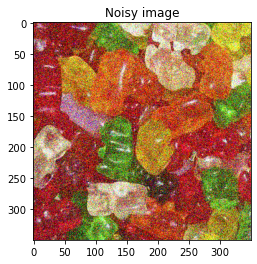

In [27]:
plt.figure(4)
plt.title('Noisy image')
plt.imshow(img_noisy, cmap='gray', vmin=0, vmax=1.)

In [28]:
red_hist_noisy = np.histogram(img_noisy[..., 0], bins=50, range=(0, 1))
green_hist_noisy = np.histogram(img_noisy[..., 1], bins=50, range=(0, 1))
blue_hist_noisy = np.histogram(img_noisy[..., 2], bins=50, range=(0, 1))

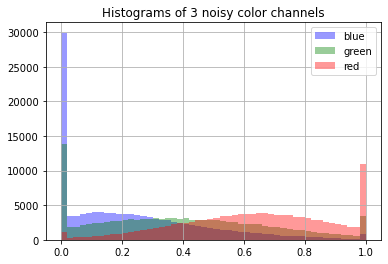

In [29]:
plt.figure(5)
plt.title('Histograms of 3 noisy color channels')
plt.bar(central_bins, blue_hist_noisy[0], bin_width, color='b', alpha=.4, label='blue')
plt.bar(central_bins, green_hist_noisy[0], bin_width, color='g', alpha=.4, label='green')
plt.bar(central_bins, red_hist_noisy[0], bin_width, color='r', alpha=.4, label='red')
plt.grid()
plt.legend()

## Part 3: Applying a Gaussian low-pass filter

After adding noise, we want to (partially) remove it again by **Gaussian filtering**.
Therefore, the function ``gaussian_filter`` of the ``nd.filter`` module can be used.
Apply the filter with a filter kernel size of ``sigma=1``.
You can either filter each image band separately or give a list of sigmas
(one for each dimension) and make sure that you do not filter across color
channels with a zero at the right place.

The ``0`` in the last axis means that we do not mix different color channels of the image.

In [31]:
nd.filters.gaussian_filter?

In [32]:
sigma = (1, 1, 0)
img_filtered = nd.filters.gaussian_filter(img_noisy, sigma)

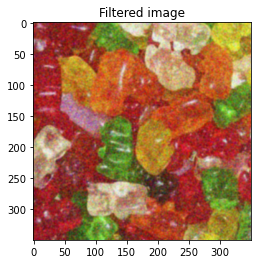

In [33]:
plt.figure(6)
plt.title('Filtered image')
plt.imshow(img_filtered, cmap='gray', vmin=0, vmax=1.)

Finally, let's look at the histograms again:

In [34]:
red_hist_filtered = np.histogram(img_filtered[..., 0], bins=50, range=(0, 1))
green_hist_filtered = np.histogram(img_filtered[..., 1], bins=50, range=(0, 1))
blue_hist_filtered = np.histogram(img_filtered[..., 2], bins=50, range=(0, 1))

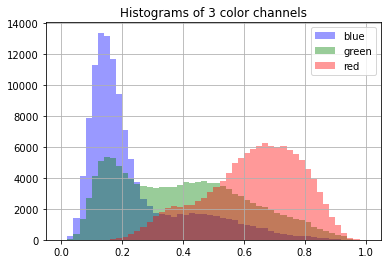

In [35]:
plt.figure(7)
plt.title('Histograms of 3 color channels')
plt.bar(central_bins, blue_hist_filtered[0], bin_width, color='b', label='blue', alpha=.4)
plt.bar(central_bins, green_hist_filtered[0], bin_width, color='g', label='green', alpha=.4)
plt.bar(central_bins, red_hist_filtered[0], bin_width, color='r', label='red', alpha=.4)
plt.grid()
plt.legend()